<a href="https://colab.research.google.com/github/QingyunLeo/BASC0005-Group20-Milk-Lovers/blob/main/Copy_of_de_coupled_stackedbar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import plotly.graph_objects as go

# download the data on CAP financing to the RegressionFolder
# available here: https://docs.google.com/spreadsheets/d/1JbP0wlB6xKSOKbXSDKx7azUIbcG31co0eT-PNd_nuBA/edit#gid=101149059)

!mkdir RegressionFolder
df = pd.read_csv ('RegressionFolder/Indicators Financing.csv')

# extracting the rows where "Member State Name" is "European Union 28" - so that the data is for the EU-28 as a whole
european_union_28 = df[df["Member State Name"] == "European Union 28"]

mkdir: cannot create directory ‘RegressionFolder’: File exists


In [ ]:
# remove the columns not used for this visualisation (all except 'Time Period','Sub-indiactor Name' and 'Data')
european_union_28 = european_union_28.drop(["Indicator Type", "Indicator Category", "Indicator Name", "Sub-indicator Parameter", "Sub-indicator Unit", 
                                 "Indicator Code", "Member State Code", "Member State Name", "Flag"], axis=1)
european_union_28

,Sub-indicator Name,Time Period,Data
1962,Expenditure coupled payments,1995,24.959
1963,Expenditure decoupled payments,1995,0.000
1964,CAP as % EU GDP,1995,0.610
1965,CAP as % of EU expenditure,1995,55.870
1966,Export refunds,1995,5.700
...,...,...,...
2344,CAP as % EU GDP,1997,0.550
2345,CAP as % of EU expenditure,1997,53.310
2346,Export refunds,1997,4.820
2347,Other market support,1997,6.450


In [ ]:
# set the index to years, the column entitled 'Time Period'
european_union_28 = european_union_28.set_index('Time Period')

In [ ]:
# extract the rows where “Sub-indicator Name” = “Expenditure coupled payments” and "Expenditure decoupled payments"
# so that we are only looking at the types of "Direct payments"
coupled_payments = european_union_28[european_union_28["Sub-indicator Name"] == "Expenditure coupled payments"]
decoupled_payments = european_union_28[european_union_28["Sub-indicator Name"] == "Expenditure decoupled payments"]

In [ ]:
# merge this extracted data so that these are side by side, using the same index (year)
coupled_decoupled = coupled_payments.merge(decoupled_payments, left_index=True, right_index=True)

In [ ]:
# Delete excess columns to make it neater and renaming the "Data" columns so that it is clear what the data is
rn_coupled_decoupled = coupled_decoupled.rename(columns={"Data_x": "Coupled payments", "Data_y": "Decoupled payments"})
f_coupled_decoupled = rn_coupled_decoupled.drop(["Sub-indicator Name_x", "Sub-indicator Name_y"], axis=1)

In [ ]:
f_coupled_decoupled

,Coupled payments,Decoupled payments
Time Period,,
1995,24.959,0.000
2018,4.684,36.213
1999,25.500,0.000
2000,28.027,0.000
1996,25.653,0.000
2001,28.836,0.000
2002,29.698,0.000
1998,25.907,0.000
2004,32.252,1.449


In [ ]:
# sorting the data so that it is in order by year, from lowest (1995) to highest (2019)
f1_coupled_decoupled = f_coupled_decoupled.sort_index(ascending=True)

In [ ]:
f1_coupled_decoupled

,Coupled payments,Decoupled payments
Time Period,,
1995,24.959,0.000
1996,25.653,0.000
1997,25.628,0.000
1998,25.907,0.000
1999,25.500,0.000
2000,28.027,0.000
2001,28.836,0.000
2002,29.698,0.000
2003,29.827,0.000


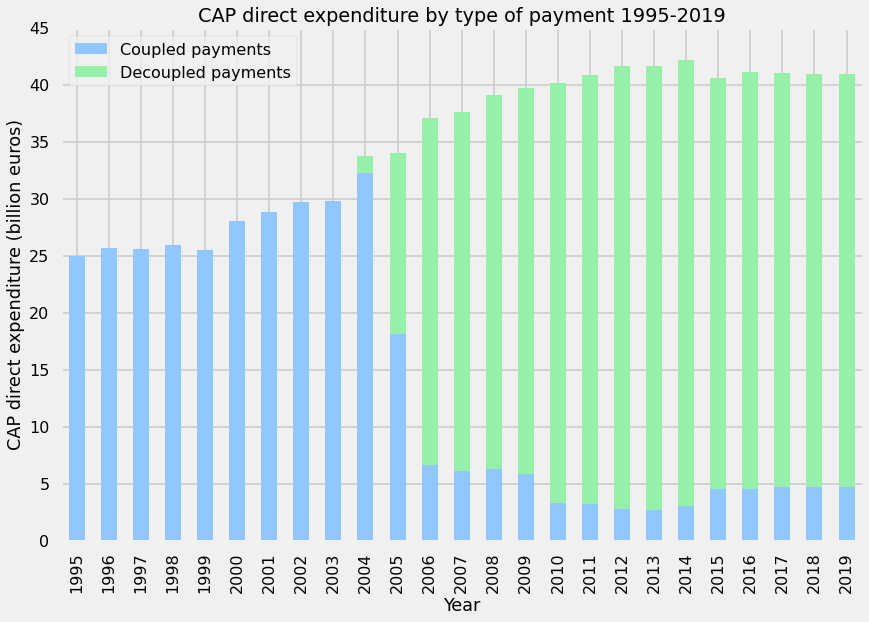

In [ ]:
# create a stacked bar chart



f2 = f1_coupled_decoupled.plot.bar(stacked=True)
plt.ylabel("CAP direct expenditure (billion euros)", color='black')
plt.xlabel('Year', color='black')
plt.title('CAP direct expenditure by type of payment 1995-2019', color='black')

plt.style.use('seaborn-poster')


plt.ylim(0,45)
plt.legend(loc='upper left')

In [ ]:
plt.savefig('directpayments')

<Figure size 921.6x633.6 with 0 Axes>